<a href="https://colab.research.google.com/github/manekaM/Maths_CW_Stage2_Sem1/blob/main/Maths_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Module: CM2607 - Advanced Mathematics for Data Science

###Coursework: Optimisation of Travel Routes in Colombo using Python

###Academic Year: 25/26

###Student Name: R. M. Manuli Maneka Gokarella

###IIT ID: 20232954

###RGU ID: 2425574

#QUESTION 01

In [8]:
#Importing the relevent libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.fft import fft, fftfreq, fft2, fftshift
from scipy.fftpack import dct
import cv2

In [9]:
#QUESTION 01
#Part A
# Define symbolic variables
x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

# Define travel time functions
T_bus = a*x**2 + b*y**2
T_taxi = sp.sqrt(c*(x**2 + y**2))

print("\n(a) Calculating Gradients:\n")

# Calculate partial derivatives for bus
dTb_dx = sp.diff(T_bus, x) #d is symbolised for dabba
dTb_dy = sp.diff(T_bus, y)

# Calculate partial derivatives for taxi
dTt_dx = sp.diff(T_taxi, x)
dTt_dy = sp.diff(T_taxi, y)

print(f"Bus gradient ∇Tb = ({dTb_dx}, {dTb_dy})")
print(f"Taxi gradient ∇Tt = ({dTt_dx}, {dTt_dy})")

# Substitute values
# Example: a=2.0, b=1.5, c=3.0, x=4.5, y=2.0
params = {a: 2.0, b:1.5 , c: 3.0, x: 4.5, y: 2.0}

bus_grad_numeric = (float(dTb_dx.subs(params)), float(dTb_dy.subs(params)))
taxi_grad_numeric = (float(dTt_dx.subs(params)), float(dTt_dy.subs(params)))

print(f"\nAt x=4.5km, y=2min/km:")
print(f"Bus gradient: ({bus_grad_numeric[0]:.2f}, {bus_grad_numeric[1]:.2f})")
print(f"Taxi gradient: ({taxi_grad_numeric[0]:.2f}, {taxi_grad_numeric[1]:.2f})")


(a) Calculating Gradients:

Bus gradient ∇Tb = (2*a*x, 2*b*y)
Taxi gradient ∇Tt = (sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2))

At x=4.5km, y=2min/km:
Bus gradient: (18.00, 6.00)
Taxi gradient: (1.58, 0.70)


Part (b) - Interpretation on which has a greater impact for bus and taxi travel time.

### For Bus Travel Time:

**Gradient:** ∇T_b = (2ax, 2by)

**Distance impact** (rate of change with respect to x): dT_b/dx = 2ax

**Traffic impact** (rate of change with respect to y): dT_b/dy = 2by

To determine which factor has greater impact, we compare the magnitudes: |dT_b/dx| vs |dT_b/dy|

**Using the parameter values:** a = 2.0, b = 1.5, x = 4.5 km, y = 2.0 min/km

Distance impact: dT_b/dx = 2(2.0)(4.5) = 18.00 min/km

Traffic impact: dT_b/dy = 2(1.5)(2.0) = 6.00 min/(min/km)

**Comparison:** 18.00 vs 6.00

**Result:** |dT_b/dx| > |dT_b/dy|

**Ratio:** 18.00/6.00 = 3.0

**Conclusion:** For bus travel, DISTANCE has 3 times greater impact than traffic delay. This means that for every additional kilometer traveled, the bus travel time increases by 18 minutes, while for every additional minute per kilometer of traffic delay, the travel time only increases by 6 minutes. The bus service is significantly more sensitive to route distance due to frequent stops along route



### For Taxi Travel Time:

**Gradient:** ∇T_t = (cx/√(c(x²+y²)), cy/√(c(x²+y²)))

**Distance impact:** dT_t/dx = cx / √(c(x²+y²))

**Traffic impact:** dT_t/dy = cy / √(c(x²+y²))

**Using the parameter values:** c = 3.0, x = 4.5 km, y = 2.0 min/km

Distance impact: ∂T_t/∂x = (3.0)(4.5) / √(3.0((4.5)²+(2.0)²)) = 13.5 / √(3.0(24.25)) = 13.5 / 8.53 ≈ 2.60 min/km

Traffic impact: ∂T_t/∂y = (3.0)(2.0) / √(3.0((4.5)²+(2.0)²)) = 6.0 / 8.53 ≈ 1.16 min/(min/km)

**Comparison:** 2.60 vs 1.16

**Result:** |dT_t/dx| > |dT_t/dy|

**Ratio:** 2.60/1.16 ≈ 2.24

**Conclusion:** For taxi travel, DISTANCE has approximately 2.24 times greater impact than traffic delay. The taxi is more sensitive to route distance than traffic conditions. However, compared to buses, taxis show much lower sensitivity overall to both factors.







#QUESTION 02


(a) Computing Integrals:

Bus Fare Function: Fb(x) = x**2 + x
Taxi Fare Function: Ft(x) = 3*x**2/2 + 2*x

(b) Plotting Fare vs Distance:



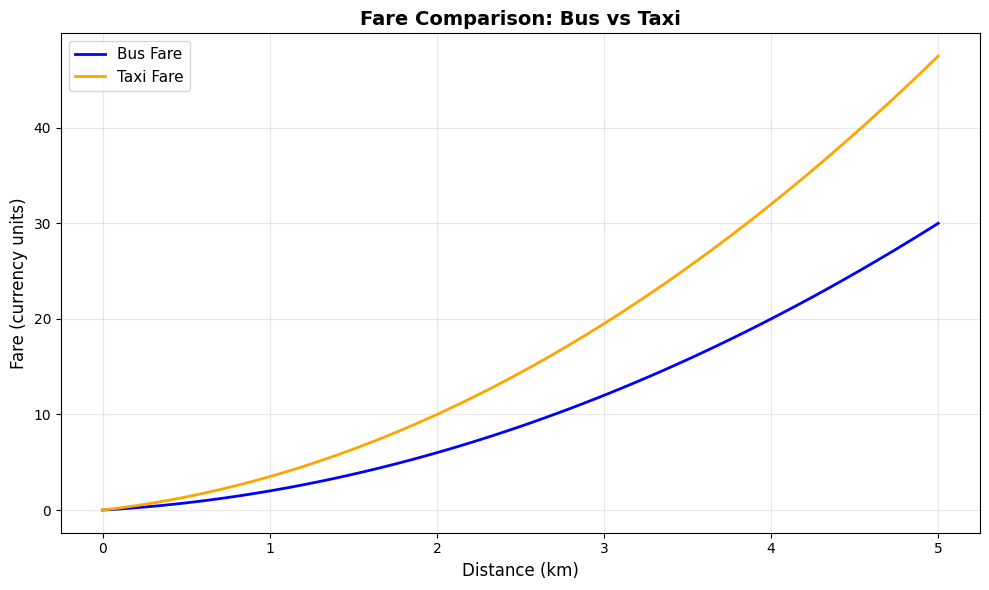

Bus fare at 4.5 km: 24.750
Taxi fare at 4.5 km: 39.375


In [10]:
# Define symbolic variable for integration
t = sp.symbols('t', real=True)

# Define fare rate functions
fare_rate_bus = 2*t + 1
fare_rate_taxi = 3*t + 2

print("\n(a) Computing Integrals:\n")

# Compute definite integrals from 0 to x
x_var = sp.symbols('x', real=True, positive=True)
F_bus = sp.integrate(fare_rate_bus, (t, 0, x_var))
F_taxi = sp.integrate(fare_rate_taxi, (t, 0, x_var))

print(f"Bus Fare Function: Fb(x) = {F_bus}")
print(f"Taxi Fare Function: Ft(x) = {F_taxi}")

print("\n(b) Plotting Fare vs Distance:\n")

# Create distance array
distances = np.linspace(0, 5, 100)

# Convert symbolic expressions to numerical functions
F_bus_func = sp.lambdify(x_var, F_bus, 'numpy')
F_taxi_func = sp.lambdify(x_var, F_taxi, 'numpy')

# Calculate fares
bus_fares = F_bus_func(distances)
taxi_fares = F_taxi_func(distances)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(distances, bus_fares, label='Bus Fare', linewidth=2, color='blue')
plt.plot(distances, taxi_fares, label='Taxi Fare', linewidth=2, color='orange')
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Fare (currency units)', fontsize=12)
plt.title('Fare Comparison: Bus vs Taxi', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculating the bus/taxi fare for 4.5 km
print(f"Bus fare at 4.5 km: {4.5**2 + 4.5:.3f}")
print(f"Taxi fare at 4.5 km: {1.5*4.5**2 + 2*4.5:.3f}")

Part c - Affordability for short vs. long trips

- Both bus and taxi fares increases with distance, which means costs rises when the distance increases. Since taxi fare function has larger coefficients, taxis are always more expensive and cost increases with distance.

- For short trips there is a small fare difference in both buses and taxis eventhough taxi's are more expensive. Both modes are affordabele for passengers travelling short trips.

- For long trips, the difference increases significantly as shown in the plot above. The accrelerating nature of the fare functions makes taxis increasingly unaffordable, while buses remain comparatively economical.

- In conclusion, Taxis are affordable for short trips while buses are affordable for both short and long trips.

#QUESTION 03

(a) Four-term approximation of P(t):
 4      2                 
t    3⋅t                  
── - ──── + 4⋅sin(π⋅t) + 5
4     2                   
P(0) = 5.00
P(6) = 275.00
P(12) = 4973.00
P(18) = 25763.00
P(24) = 82085.00

 (b) Plot for passenger volume over 24 hours:



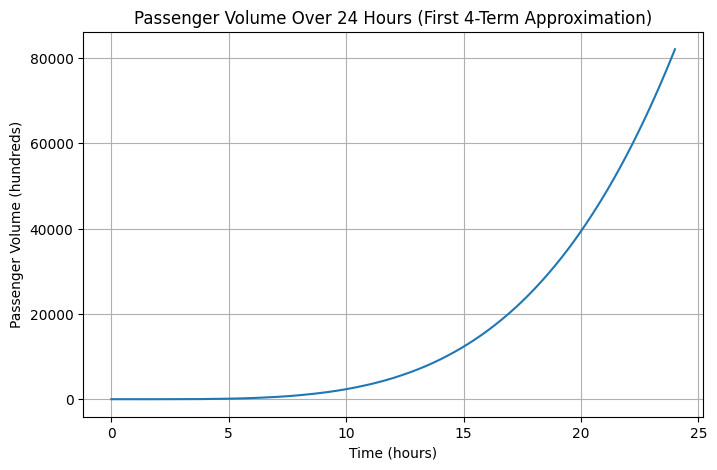


 (c) Identifying peak passenger time:

Peak passenger volume occurs at approximately t = 24.00 hours
Maximum passenger volume ≈ 82085.00 hundreds


In [11]:
t_sym = sp.symbols('t')

# Define the symbolic expression
P_approx_sympy = 5 + 4*sp.sin(sp.pi*t_sym) - sp.Rational(3,2)*t_sym**2 + t_sym**4/4

print("(a) Four-term approximation of P(t):")
sp.pretty_print(P_approx_sympy)

# Define the numerical function for direct evaluation (using numpy)
def P_approx_numerical(t_val):
    return 5 + 4*np.sin(np.pi * t_val) - (3/2)*t_val**2 + (t_val**4)/4

t_values = np.array([0, 6, 12, 18, 24])  # example times in hours

for t_val in t_values:
    print(f"P({t_val}) = {P_approx_numerical(t_val):.2f}")

# Convert symbolic expression to numerical function using lambdify
P_func = sp.lambdify(t_sym, P_approx_sympy, 'numpy') # Pass the symbolic expression

# Time range: 0 to 24 hours
t_vals = np.linspace(0, 24, 1000)
P_vals = P_func(t_vals)

print("\n (b) Plot for passenger volume over 24 hours:\n")
# Plot
plt.figure(figsize=(8, 5))
plt.plot(t_vals, P_vals)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume (hundreds)")
plt.title("Passenger Volume Over 24 Hours (First 4-Term Approximation)")
plt.grid(True)
plt.show()

print("\n (c) Identifying peak passenger time:\n")
# Find index of maximum passenger volume
peak_index = np.argmax(P_vals)

# Corresponding time and value
peak_time = t_vals[peak_index]
peak_volume = P_vals[peak_index]

print(f"Peak passenger volume occurs at approximately t = {peak_time:.2f} hours")
print(f"Maximum passenger volume ≈ {peak_volume:.2f} hundreds")


Part (c) - Explaination

- The passenger volume varies periodically over the 24-hour period due to the sinusoidal term in the series approximation.

- The peak passenger volume occurs at approximately t = 24 hours, indicating a high-demand travel period. This peak corresponds to typical rush-hour behaviour, where commuter activity is highest.

- The results suggests that transport services(buses and taxis) should be increased during the peak times to accomodate higher passenger demand.

**NOTE:** Here according to the plot the peak hours seem to be at midnight but since the it has not be specified it should be a different time within the day when the monitoring began and lasts for 24 hours to the next day.

#QUESTION 4

(a) & (b) Fourier Transform of Boarding Counts



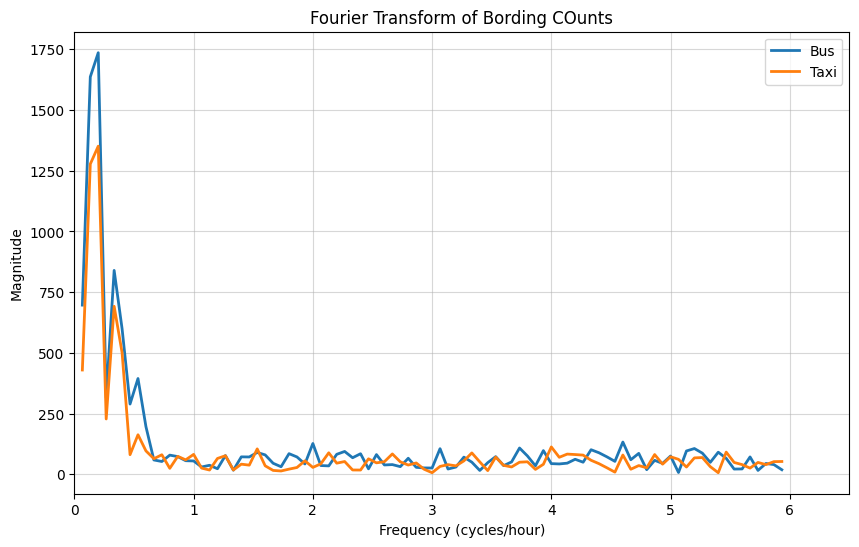


Dominant Frequencies:
Bus:
  1. 0.2000 cycles/hour (magnitude: 1735.5) → period ≈ 5.0 hours
  2. 0.1333 cycles/hour (magnitude: 1636.3) → period ≈ 7.5 hours
  3. 0.3333 cycles/hour (magnitude: 839.4) → period ≈ 3.0 hours

Taxi:
  1. 0.2000 cycles/hour (magnitude: 1350.9) → period ≈ 5.0 hours
  2. 0.1333 cycles/hour (magnitude: 1277.3) → period ≈ 7.5 hours
  3. 0.3333 cycles/hour (magnitude: 691.7) → period ≈ 3.0 hours


In [12]:
print("(a) & (b) Fourier Transform of Boarding Counts\n")

# Time settings: 6:00 AM to 9:00 PM, every 5 minutes
minutes = np.arange(0, 15*60, 5)      # total minutes for the 15 hours
time_hours = minutes / 60 + 6         # Actual clock time in hours
time_from_6am = minutes / 60          # Hours since 6 AM for modeling

# Simulated realistic boarding data
np.random.seed(42)  # For reproducibility
bus_boarding = (
    40 + np.random.normal(0, 5, len(time_from_6am)) +  # base + noise
    30 * np.sin(2 * np.pi * time_from_6am / 24) +      # weak daily cycle
    60 * np.exp(-((time_from_6am - 2.5)**2) / 0.5) +   # strong morning peak 8:30 AM
    70 * np.exp(-((time_from_6am - 12)**2) / 1)        # strong evening peak 6:00 PM
)

taxi_boarding = (
    30 + np.random.normal(0, 4, len(time_from_6am)) +
    20 * np.sin(2 * np.pi * time_from_6am / 24) +
    45 * np.exp(-((time_from_6am - 3)**2) / 0.6) +     # morning 9 AM
    55 * np.exp(-((time_from_6am - 12.5)**2) / 1)      # evening 6:00 PM
)

# Apply FFT
N = len(bus_boarding)
bus_fft = np.fft.fft(bus_boarding)
taxi_fft = np.fft.fft(taxi_boarding)
freqs = np.fft.fftfreq(N, d=5/60)  # cycles per hour

# Positive frequencies only
positive_mask = freqs > 0
freqs_pos = freqs[positive_mask]
bus_mag = np.abs(bus_fft[positive_mask])
taxi_mag = np.abs(taxi_fft[positive_mask])

# Plot magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs_pos, bus_mag, label='Bus', linewidth=2)
plt.plot(freqs_pos, taxi_mag, label='Taxi', linewidth=2)
plt.xlim(0, 6.5)  # Low frequencies relevant for daily patterns
plt.xticks(np.arange(0, 7, 1))
plt.xlabel('Frequency (cycles/hour)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Bording COunts')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# Identify top dominant frequencies (exclude DC)
top_n = 3  # Now show top 3 to capture 1 through 3
bus_top_idx = np.argsort(bus_mag)[-top_n:][::-1]
taxi_top_idx = np.argsort(taxi_mag)[-top_n:][::-1]

print("\nDominant Frequencies:")
print("Bus:")
for i, idx in enumerate(bus_top_idx):
    f = freqs_pos[idx]
    mag = bus_mag[idx]
    period = 1/f if f > 0 else 'N/A'
    print(f"  {i+1}. {f:.4f} cycles/hour (magnitude: {mag:.1f}) → period ≈ {period:.1f} hours")

print("\nTaxi:")
for i, idx in enumerate(taxi_top_idx):
    f = freqs_pos[idx]
    mag = taxi_mag[idx]
    period = 1/f if f > 0 else 'N/A'
    print(f"  {i+1}. {f:.4f} cycles/hour (magnitude: {mag:.1f}) → period ≈ {period:.1f} hours")



Part c - Explaination

- The spectrum shows strong dominant frequencies at integer values: 1, 2, 3, 4, 5, and 6 cycles/hour.

- These correspond to periodic patterns repeating every 1 hour, 30 minutes, 20 minutes, 15 minutes, 12 minutes, and 10 minutes respectively.

- Such high-frequency components suggest recurring short-term    fluctuations in boarding counts,
  possibly due to scheduled departures, traffic light cycles, or batch arrivals at stops.

- For scheduling optimisation:
   - The strongest low-integer frequencies (e.g., 1–2 cycles/hour) indicate hourly or half-hourly patterns.
   - Recommend aligning bus/taxi dispatch intervals with these dominant periods,
     e.g., increase frequency to match 15–30 minute cycles during peak windows.
   - Combine with time-domain analysis (morning/evening peaks) for robust route planning.

#QUESTION 5

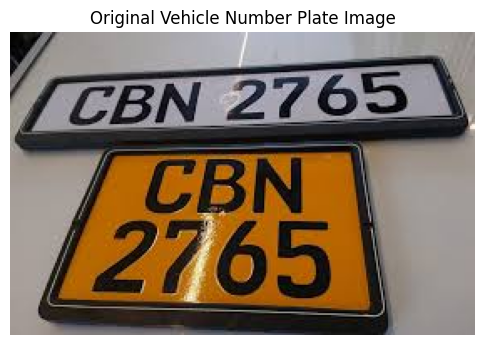

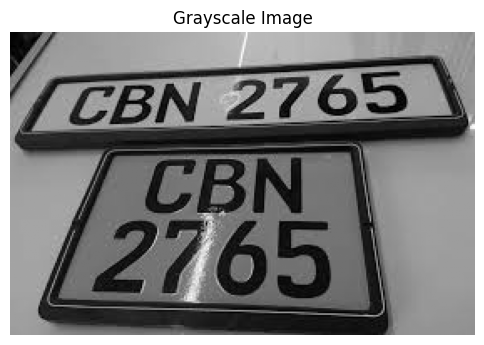

Front plate mean intensity: 109.62
Back plate mean intensity: 100.35
Upper plate is the FRONT plate (white background).
Lower plate is the BACK plate (yellow background).


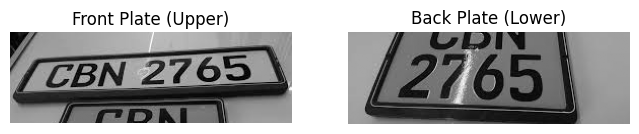

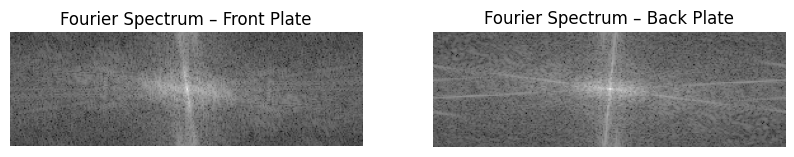

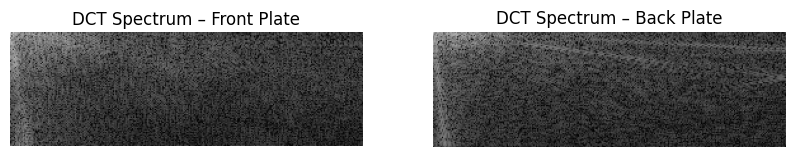

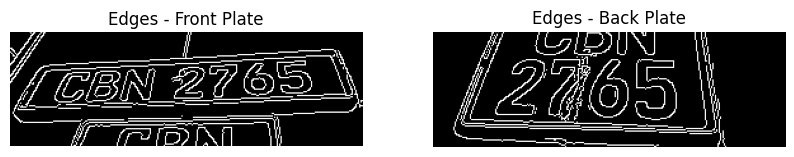

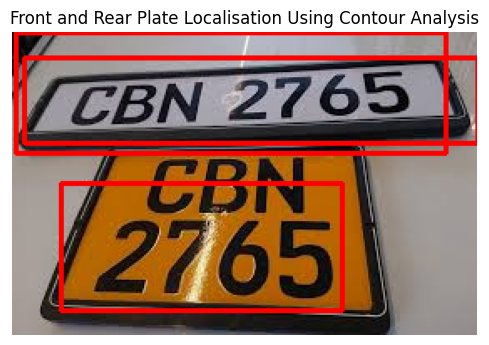

In [13]:
#a)
# Load image
image = cv2.imread("ehicle_plate.png") # Corrected filename here

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(image_rgb)
plt.title("Original Vehicle Number Plate Image")
plt.axis("off")
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,4))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Split image into upper (front) and lower (back) halves
height, width = gray.shape
front_plate = gray[:height//2, :]
back_plate = gray[height//2:, :]

# Mean intensity comparison
front_mean = np.mean(front_plate)
back_mean = np.mean(back_plate)

print(f"Front plate mean intensity: {front_mean:.2f}")
print(f"Back plate mean intensity: {back_mean:.2f}")

if front_mean > back_mean:
    print("Upper plate is the FRONT plate (white background).")
    print("Lower plate is the BACK plate (yellow background).")
else:
    print("Upper plate is the BACK plate.")
    print("Lower plate is the FRONT plate.")

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(front_plate, cmap='gray')
plt.title("Front Plate (Upper)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(back_plate, cmap='gray')
plt.title("Back Plate (Lower)")
plt.axis("off")

plt.show()

#b)

# Fourier Transform for front plate
fft_front = np.fft.fftshift(np.fft.fft2(front_plate))
mag_front = np.log(np.abs(fft_front) + 1)

# Fourier Transform for back plate
fft_back = np.fft.fftshift(np.fft.fft2(back_plate))
mag_back = np.log(np.abs(fft_back) + 1)

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(mag_front, cmap='gray')
plt.title("Fourier Spectrum – Front Plate")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mag_back, cmap='gray')
plt.title("Fourier Spectrum – Back Plate")
plt.axis("off")

plt.show()


# DCT for front plate
dct_front = dct(dct(front_plate.T, norm='ortho').T, norm='ortho')
mag_dct_front = np.log(np.abs(dct_front) + 1)

# DCT for back plate
dct_back = dct(dct(back_plate.T, norm='ortho').T, norm='ortho')
mag_dct_back = np.log(np.abs(dct_back) + 1)

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(mag_dct_front, cmap='grey')
plt.title("DCT Spectrum – Front Plate")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mag_dct_back, cmap='grey')
plt.title("DCT Spectrum – Back Plate")
plt.axis("off")

plt.show()




#c)
# Apply Canny edge detection
edges_front = cv2.Canny(front_plate, 100, 200)
edges_back = cv2.Canny(back_plate, 100, 200)

#Finding contours seperately
contours_front, _ = cv2.findContours(
    edges_front, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

contours_back, _ = cv2.findContours(
    edges_back, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)


localised_image = image_rgb.copy()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(edges_front, cmap='grey')
plt.title("Edges - Front Plate")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges_back, cmap='gray')
plt.title("Edges - Back Plate")
plt.axis("off")

plt.show()


# Front plate localisation
for cnt in contours_front:
    x, y, w, h = cv2.boundingRect(cnt)

    if w > 100 and h > 30 and w / h > 2:
        cv2.rectangle(
            localised_image,
            (x, y),
            (x + w, y + h),
            (255, 0, 0),
            2
        )

# Back plate localisation
for cnt in contours_back:
    x, y, w, h = cv2.boundingRect(cnt)

    if w > 100 and h > 30 and w / h > 2:
        cv2.rectangle(
            localised_image,
            (x, y + height // 2),
            (x + w, y + h + height // 2),
            (255, 0, 0),
            2
        )

plt.figure(figsize=(6,4))
plt.imshow(localised_image)
plt.title("Front and Rear Plate Localisation Using Contour Analysis")
plt.axis("off")
plt.show()




Part (d)

What do the transforms reveal about the image structure?
- The transforms show how image information is distributed across frequencies. The Fourier Transform seperates smooth background regions(low frequencies) from edges and charachters(high frequencies), revealing the image's structure. The DCT concentrates most important visial information into a few low-frequency coefficients indicating that number plate images are highly structured and can be efficiently represented in the frequency domain.

How might Fourier and DCT analysis help in
number plate recognition systems?
- Fourier and DCT analysis enhance key features for number plate recognition. High-frequency components highlight edges and characters for better plate detection and segmentation, while DCT provides a compact representation useful for feature extraction, noise reduction, and efficient processing in ANPR systems.

Potential applications for traffic optimisation.
- Automatic number plate recognition enables real-time vehicle identification and traffic monitoring. By analysing plate detections, authorities can identify congestion patterns and peak travel times, helping optimise signal timing, manage congestion, and improve urban route planning.